Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion

In [1]:
# load env
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["PINECODE_API_KEY"]=os.getenv("PINECODE_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["HUGGINGFACE_API_KEY"]=os.getenv("HUGGINGFACE_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]=os.getenv("LANGCHAIN_TRACING_V2")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["WEATHER_API_KEY"]=os.getenv("WEATHER_API_KEY")
os.environ["SERPER_API_KEY"]=os.getenv("SERPER_API_KEY")
os.environ["EXCHANGE_RATE_API"]=os.getenv("EXCHANGE_RATE_API")

In [2]:
# load llm model
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o", temperature=0)

In [3]:
#search attraction and activity
#1. search attraction
#2. search restaurant
#3. search activity
#4. search transportation
from langchain_core.tools import tool
from langchain_tavily import TavilySearch
max_search_results=10

def tavily_search(query:str) -> str:
    tavily = TavilySearch(max_results=max_search_results)
    return tavily.invoke(query)
    
@tool
def search_attractions(city: str) -> str:
    """
    Search top tourist attractions in a given city.

    Args:
        city (str): Name of the city to search for tourist attractions.

    Returns:
        str: A list of top tourist attractions or places of interest.
    """
    return tavily_search(f"top tourist attractions in {city}")


@tool
def search_restaurants(city: str) -> str:
    """
    Search the best restaurants in a given city.

    Args:
        city (str): Name of the city to search for restaurants.

    Returns:
        str: A list of popular restaurants to try.
    """
    return tavily_search(f"best restaurants to try in {city}")


@tool
def search_activities(city: str) -> str:
    """
    Search top activities or things to do in a city.

    Args:
        city (str): Name of the city to search for fun activities.

    Returns:
        str: A list of popular activities or experiences in the city.
    """
    return tavily_search(f"fun activities to do in {city}")

@tool
def search_transportation(city: str) -> str:
    """
    Search transportation options in a city.

    Args:
        city (str): Name of the city to search for transport details.

    Returns:
        str: Transportation options like bus, metro, taxi, and car rental.
    """
    return tavily_search(f"list of transportation options in {city} for tourists")



In [4]:
search_attractions.invoke("delhi")


{'query': 'top tourist attractions in delhi',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': '44 Places to Visit in Delhi in 2025 | Top Tourist Attractions & Places',
   'url': 'https://www.makemytrip.com/tripideas/places-to-visit-in-delhi',
   'content': "Counted among the top places to visit in Delhi, the Akshardham Temple honours the Hindu god, Lord Swaminarayan and showcases 10,000 years of Indian history and architecture. It's among the largest and most culturally significant temples in the country, making it one of the best tourist places to visit in New Delhi.",
   'score': 0.91023487,
   'raw_content': None},
  {'title': 'Top 10 Famous Tourist Places in Delhi to Visit in 2025',
   'url': 'https://thenewdelhi.in/best-place-to-visit/top-10-famous-tourist-places-in-delhi/',
   'content': 'Discover the top 10 famous tourist places in Delhi to visit in 2025, from historic forts to vibrant markets and stunning temples. Delhi, the heart of India, 

In [5]:
search_activities.invoke("delhi")


{'query': 'fun activities to do in delhi',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': '41 Fun Places in Delhi to Visit Right Now - Suzanne Wanders Delhi',
   'url': 'https://suzannewandersdelhi.com/fun-places-in-delhi/',
   'content': "Delhi is a great mix of historic sites, fun activities, and eclectic neigbourhoods. There's something for everyone. Here are the most fun places in Delhi: 1. India Gate ... The sound and light show Jai Hind is one of the most fun things to do in Delhi. It's a dynamic show with live performers, puppets, state of the art sound and visual",
   'score': 0.9053309,
   'raw_content': None},
  {'title': '39 Fun Places To Visit In Delhi With Friends & Family In 2025',
   'url': 'https://traveltriangle.com/blog/fun-places-in-delhi/',
   'content': '*   [**List of 39 Places To Visit In Delhi With Friends**](https://traveltriangle.com/blog/fun-places-in-delhi/#1_1) Book Cafes – Haven For Bookworms](https://traveltriangle.co

In [5]:
search_restaurants.invoke("delhi")

{'query': 'best restaurants to try in delhi',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': '15 Best Restaurants in Delhi That Must Try Once in 2024 - FabHotels',
   'url': 'https://www.fabhotels.com/blog/restaurants-in-delhi/',
   'content': 'The restaurant serves its biryanis and slow-cooked kebabs in its magnificent silver and blue dining room, adorned with crystal chandeliers, making it among the best Delhi restaurants for couples. While here, do not forget to order Dum Pukht biryani, shahi nihari, dudiya kabab and Kakori kabab. Location: ITC Maurya, Chanakyapuri, Delhi',
   'score': 0.8997663,
   'raw_content': None},
  {'title': 'The 12 best restaurants in Delhi - Time Out',
   'url': 'https://www.timeout.com/delhi/restaurants/best-restaurants-in-delhi',
   'content': 'From traditional eateries to hidden gems, the best restaurants in Delhi make a compelling case Sunday 6 November 2022 Share Copy Link FacebookTwitterPinterestEmailWhatsApp Wri

In [6]:

search_transportation.invoke("delhi")

{'query': 'list of transportation options in delhi for tourists',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Delhi Transportation: Air, Train, Metro, Taxi, Rickshaw & Buses',
   'url': 'https://www.agatetravel.com/india/delhi/transportation.html',
   'content': 'Delhi Transportation ... Check out all the possible options. 1. Air Transport ... The Delhi Darshan tourist bus will take you sightseeing to important locations in Delhi. Fare INR 100 and will cover 102 km (63 mi) for a complete city tour. You can also travel by the stage carriage buses; a bit more comfortable. Minimum fare till 8 km is INR7',
   'score': 0.88178825,
   'raw_content': None},
  {'title': 'Delhi Tourism : Transport',
   'url': 'https://www.delhitourism.gov.in/transport/local_transport.html',
   'content': 'The local transportation is the lifeline of the capital city of Delhi. More than half of the population in Delhi is dependent on local transport for commuting purposes

In [9]:
import requests
#search weather forecast
#1. get current weather
#2. get weather forecast
from langchain_core.tools import tool
# Set only if the env var exists
weather_key = os.getenv("WEATHER_API_KEY")
@tool
def current_weather(city:str) ->str:
    """
    Fetches the current weather conditions for a given city.

    input: city (string)

    output: Current temperature, condition (e.g., "Sunny, 25°C")
    """
    url = f"http://api.weatherstack.com/current?access_key={weather_key}&query={city}"
    response = requests.get(url)
    return response.json()

@tool
def weather_forecast(city:str, days: int = 5) ->str:
    """
    Fetches weather forecast for a given city.

    input: city (string), days (int, default 5)
    output: Weather forecast for next few days
    """
    try:
        # Get city coordinates
        geo_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=1"
        geo_response = requests.get(geo_url)
        geo_data = geo_response.json()
        
        if not geo_data.get('results'):
            return f"Error: Could not find {city}"
        
        lat = geo_data['results'][0]['latitude']
        lon = geo_data['results'][0]['longitude']
        
        # Get forecast (free, no API key)
        forecast_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&daily=temperature_2m_max,temperature_2m_min,weather_code&forecast_days={days}"
        response = requests.get(forecast_url)
        data = response.json()
        
        forecast_text = f"Weather forecast for {city}:\n"
        
        conditions = {
            0: "Clear", 1: "Mostly clear", 2: "Partly cloudy", 3: "Overcast",
            45: "Foggy", 51: "Light drizzle", 61: "Light rain", 63: "Rain", 
            71: "Light snow", 95: "Thunderstorm"
        }
        
        for i in range(len(data['daily']['time'])):
            date = data['daily']['time'][i]
            max_temp = data['daily']['temperature_2m_max'][i]
            min_temp = data['daily']['temperature_2m_min'][i]
            code = data['daily']['weather_code'][i]
            condition = conditions.get(code, "Unknown")
            
            forecast_text += f"{date}: {condition}, High {max_temp}°C, Low {min_temp}°C\n"
        
        return forecast_text
        
    except Exception as e:
        return f"Error: {str(e)}"

In [10]:
response = current_weather.invoke("dhaka")
response

{'request': {'type': 'City',
  'query': 'Dhaka, Bangladesh',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Dhaka',
  'country': 'Bangladesh',
  'region': '',
  'lat': '23.723',
  'lon': '90.409',
  'timezone_id': 'Asia/Dhaka',
  'localtime': '2025-06-20 09:14',
  'localtime_epoch': 1750410840,
  'utc_offset': '6.0'},
 'current': {'observation_time': '03:14 AM',
  'temperature': 31,
  'weather_code': 353,
  'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0009_light_rain_showers.png'],
  'weather_descriptions': ['Light rain shower'],
  'astro': {'sunrise': '05:12 AM',
   'sunset': '06:48 PM',
   'moonrise': '12:34 AM',
   'moonset': '01:26 PM',
   'moon_phase': 'Waning Crescent',
   'moon_illumination': 37},
  'air_quality': {'co': '331.15',
   'no2': '19.24',
   'o3': '59',
   'so2': '12.21',
   'pm2_5': '24.235',
   'pm10': '24.79',
   'us-epa-index': '2',
   'gb-defra-index': '2'},
  'wind_speed': 17,
  'wind_degree': 187,
  'wind_di

In [ ]:
response = weather_forecast.invoke("dhaka")
from IPython.display import Markdown
Markdown(response)

Weather forecast for dhaka:
2025-06-20: Thunderstorm, High 30.9°C, Low 25.9°C
2025-06-21: Thunderstorm, High 31.5°C, Low 26.0°C
2025-06-22: Thunderstorm, High 31.1°C, Low 26.0°C
2025-06-23: Unknown, High 29.5°C, Low 25.9°C
2025-06-24: Unknown, High 31.1°C, Low 26.0°C


In [ ]:
#search hotel costs
#1. search hotel
#2. budget_range
from langchain_core.tools import tool
from langchain_community.utilities import GoogleSerperAPIWrapper

@tool
def search_hotels(city: str, budget: int) -> str:
    """search hotel in the city under the user budget
    Args:
        city: str (which city user want to travel)
        budget: int (how much money user want to pay for hotel)
    
    output: it will provide some hotel name and cost such as day or week or the hotel policy wise.
    
    """
    search = GoogleSerperAPIWrapper()
    
    query = f"best hotel in {city} under ${budget}"
    
    response = search.run(query)
    return response

In [15]:
response=search_hotels.run({"city": "dhaka", "budget": 100})
Markdown(response)

Cheap Hotels in Dhaka City · 1. Hotel Tropical Daisy · 2. Lakeshore Banani · 3. Hotel 71 · 4. The Westin Dhaka · 5. Royal Park Residence. Some of the best cheap hotels in Dhaka include Hotel 71, Tropical Daisy, Richmond Hotel and Suites, Innotel Business Boutique Hotel, Hotel Shuktara, Hotel ... Hotel Afford Inn, hotel in Dhaka Division · Breakfast included · 1. Hotel Afford Inn. 4.5. (63 reviews). #1 Best Value of 24 Cheap Hotels in Dhaka Division. Looking for Dhaka Hotel? 2-star hotels from $10, 3 stars from $16 and 4 stars+ from $25. Stay at hotel al-sarwar from $11/night, Hotel Labbaik Farmgate from ... The best cheap hotels in Dhaka · Hotel New Kalabgan Residential, hotel in Dhaka · Hotel Shuktara Dhaka, hotel in Dhaka · Hotel Prime Inn Mirpur, hotel in Dhaka ... The cheapest price for a room in Dhaka found in the last 7 days is $15/night. This rate is available with Ali International Hotel, a 2-star hotel. Travel with ... Search 22 Cheap Hotels in Dhaka from ฿2044. Compare room rates, hotel reviews and availability. Most hotels are fully refundable. Room facilities · Hotel 71 · Hotel Skylink · Hotel Uttara · Hotel Air Inn Dhaka - Airport View · Hotel Seven Star · Nagar Valley Hotel Ltd. · Quality Inn Dhaka. Search and book Dhaka hotels from £7/night and compare prices from all the top providers direct with Skyscanner. Browse unbiased reviews and photos to find ... Cheap Hotels in Dhaka · Galesia Hotel & Resort Ltd · Galesia Hotel & Resort Ltd · Platinum Grand · Platinum Grand · Park Hyatt Dhaka · Park Hyatt Dhaka · Hostel ...

In [17]:
#3. estimate the hotel cost
from langchain_core.tools import tool
from pydantic import BaseModel, Field


@tool
def estimate_hotel_cost(price_per_night: float, total_days: int) -> float:
    """Estimate total hotel cost based on price per night and number of days.
    
    price_per_night: float (description="Price per night of the selected hotel in USD")
    total_days: int (description="Total number of days the user will stay")
    
    """
    try:
        return round(price_per_night * total_days, 2)
    except Exception as e:
        return str(e)


In [18]:
estimate_hotel_cost.invoke({"price_per_night": 150.0,"total_days": 5})

750.0

In [19]:
#currency_conversion
#1. get exchange rate
#2. convert currency
import requests
from langchain_core.tools import tool

EXCHANGE_API_KEY = os.getenv("EXCHANGE_RATE_API")

@tool
def get_conversion_factor(base_currency: str, target_currency: str) -> float:
    """
    Fetch the currency conversion rate between two currencies.

    Args:
        base_currency (str): The code of the base currency (e.g., 'USD').
        target_currency (str): The code of the currency to convert to (e.g., 'BDT').

    Returns:
        float: The conversion rate from base_currency to target_currency.
    """
    url = f"https://v6.exchangerate-api.com/v6/{EXCHANGE_API_KEY}/pair/{base_currency}/{target_currency}"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200 and data.get("conversion_rate"):
        return float(data["conversion_rate"])
    else:
        raise ValueError(f"Failed to get conversion rate: {data}")

In [21]:
get_conversion_factor({"base_currency": "USD","target_currency": "BDT"})

/var/folders/r6/94rtxyj11sgb8st7ytmz40ph0000gn/T/ipykernel_16748/3701879427.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_conversion_factor({"base_currency": "USD","target_currency": "BDT"})


122.2358

In [22]:
@tool
def convert_currency(amount: float, conversion_rate: float) -> float:
    """
    Convert an amount from base currency to target currency using a conversion rate.

    Args:
        amount (float): Amount in base currency.
        conversion_rate (float): Conversion rate to target currency.

    Returns:
        float: Amount in target currency.
    """
    return round(amount * conversion_rate, 2)

In [24]:
# define calculator tools
from langchain_core.tools import tool

@tool
def add(a : int, b : int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The addition of a and b.
    """
    return a+b

@tool
def subtract(a : int, b : int) -> int:
    """
    Subtract two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The subtraction of a and b.
    """
    return a-b

@tool
def multiply(a : int, b : int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a*b

@tool
def divide(a : int, b : int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The division of a and b.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a/b

In [ ]:
tools=[add,subtract,multiply,divide,search_attractions,search_activities,search_restaurants,search_transportation,current_weather,weather_forecast, get_conversion_factor, convert_currency]
llm_with_tools=llm.bind_tools(tools)

bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x1079fcd90>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1082b4490>, root_client=<openai.OpenAI object at 0x1079be150>, root_async_client=<openai.AsyncOpenAI object at 0x107a885d0>, model_name='gpt-4o', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')) kwargs={'tools': [{'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The addition of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'subtract', 'description': 'Subtract two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The subtraction of a and b.', 'paramete

In [51]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

tool_node=ToolNode(tools)
def travel_supervisor(state:MessagesState):
    last_message=state["messages"]
    print(f"##travel_supervisor## {last_message}")
    system_prompt="""
    You are an experienced AI Travel Advisor and Expense Planner. Your task is to assist the client in planning a trip to a given city using reasoning and tools.

    You follow the **ReAct pattern**:
    1. Think about what the user needs.
    2. Decide which tool to use and why.
    3. Call the tool using the correct arguments.
    4. Observe the result.
    5. Repeat reasoning and tool usage as needed.
    6. Finally, return a complete, friendly, and well-organized travel plan.

    Please provide the following information in well-organized, clearly labeled sections. Conclude with a concise summary (around 300 words) of the entire trip plan:
	•	Top Attractions: Must-visit landmarks and cultural highlights.
	•	Top Activities: Popular local experiences and things to do.
	•	Recommended Restaurants: Notable spots for local cuisine.
	•	Transportation Options: Major modes of connectivity within and to the city.
	•	Weather Forecast: Current weather conditions and forecasted daily weather during the travel dates as sub header.
	•	Hotel Suggestions: Top 5 hotel options with name and cost estimates based on the number of nights.
	•	Currency Information: Conversion rates from the traveler’s home currency to the local currency.
	•	Day-wise Itinerary: A detailed plan broken down by each day of the trip.
	•	Estimated Total Cost: A complete approximation covering attractions, activities, food, transport, and accommodation.
    """
    user_query=[system_prompt]+last_message
    response=llm_with_tools.invoke(user_query)
    return {"messages":[response]}

In [52]:
graph=StateGraph(MessagesState)

graph.add_node("travel_supervisor",travel_supervisor)

graph.add_node("tools",tool_node)

graph.set_entry_point("travel_supervisor")

graph.add_conditional_edges("travel_supervisor",tools_condition)

graph.add_edge("tools","travel_supervisor")

travel_planner=graph.compile()

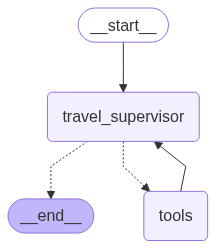

In [53]:
from IPython.display import Image, display
display(Image(travel_planner.get_graph().draw_mermaid_png()))

In [54]:
input = "Hi, I’m planning a 10-day trip to Rajasthan next month with a hotel budget of around $50 per night. Could you help me with the weather forecast, must-visit attractions, and an estimated total cost of the trip? I’ll be paying in INR, but my home currency is USD. I prefer local cuisine and public transport. Can you plan everything for me?"
recommended_plan=travel_planner.invoke({"messages": [input]})

for m in recommended_plan["messages"]:
    m.pretty_print()

##travel_supervisor## [HumanMessage(content='Hi, I’m planning a 10-day trip to Rajasthan next month with a hotel budget of around $50 per night. Could you help me with the weather forecast, must-visit attractions, and an estimated total cost of the trip? I’ll be paying in INR, but my home currency is USD. I prefer local cuisine and public transport. Can you plan everything for me?', additional_kwargs={}, response_metadata={}, id='929756b1-d3ce-4ca1-8ece-99ec0e5a9937')]
##travel_supervisor## [HumanMessage(content='Hi, I’m planning a 10-day trip to Rajasthan next month with a hotel budget of around $50 per night. Could you help me with the weather forecast, must-visit attractions, and an estimated total cost of the trip? I’ll be paying in INR, but my home currency is USD. I prefer local cuisine and public transport. Can you plan everything for me?', additional_kwargs={}, response_metadata={}, id='929756b1-d3ce-4ca1-8ece-99ec0e5a9937'), AIMessage(content='', additional_kwargs={'tool_calls

In [55]:
from IPython.display import Markdown
Markdown(recommended_plan["messages"][-1].content)

Here's a comprehensive travel plan for your 10-day trip to Rajasthan:

### Top Attractions
1. **Amber Fort and Palace**: Located near Jaipur, this majestic fort is a must-visit for its stunning architecture and historical significance.
2. **City Palace, Jaipur**: A beautiful blend of Mughal and Rajasthani architecture.
3. **Hawa Mahal**: Known as the "Palace of Winds," this iconic structure is a highlight in Jaipur.
4. **Lake Pichola, Udaipur**: Offers breathtaking views and boat rides.
5. **Mehrangarh Fort, Jodhpur**: One of the largest forts in India, offering panoramic views of the city.
6. **Jaisalmer Fort**: A living fort with shops, hotels, and ancient residences.
7. **Ranthambore National Park**: Ideal for wildlife enthusiasts.

### Top Activities
1. **Camel Safari in Jaisalmer**: Experience the Thar Desert on a camel.
2. **Hot Air Ballooning in Jaipur**: Get a bird's eye view of the city.
3. **Zip Lining in Neemrana**: For adventure seekers.
4. **Wildlife Safari in Ranthambore**: Spot tigers and other wildlife.
5. **Shopping in Jaipur**: Explore local markets for handicrafts and textiles.

### Recommended Restaurants
1. **Samode Haveli, Jaipur**: Offers authentic Rajasthani cuisine in a luxurious setting.
2. **Handi, Jaipur**: Known for its traditional Rajasthani dishes.
3. **The Green House, Pushkar**: Offers a modern take on traditional food.
4. **Suvarna Mahal at Rambagh Palace, Jaipur**: Known for its thali spreads.
5. **Latitude, Jodhpur**: A modern twist on traditional cuisine.

### Transportation Options
- **Road Transport**: Extensive network of buses operated by Rajasthan State Road Transport Corporation (RSRTC).
- **Railways**: Well-connected with major cities; luxury trains like Palace on Wheels.
- **Airports**: Major airports in Jaipur, Jodhpur, and Udaipur.

### Weather Forecast
- **Current Weather**: Not available.
- **Forecast**: Expect mild to warm temperatures with occasional cool breezes, typical of Rajasthan in November.

### Hotel Suggestions
- Budget: $50 per night, approximately ₹4,000 INR.
- Total for 10 nights: ₹40,000 INR.

### Currency Information
- **Conversion Rate**: 1 USD = 86.80 INR.

### Day-wise Itinerary
- **Day 1-3**: Explore Jaipur (Amber Fort, City Palace, Hawa Mahal).
- **Day 4-5**: Visit Udaipur (Lake Pichola, City Palace).
- **Day 6-7**: Discover Jodhpur (Mehrangarh Fort).
- **Day 8-9**: Experience Jaisalmer (Jaisalmer Fort, Camel Safari).
- **Day 10**: Wildlife Safari in Ranthambore.

### Estimated Total Cost
- **Accommodation**: ₹40,000 INR
- **Food**: ₹15,000 INR
- **Transport**: ₹10,000 INR
- **Activities & Attractions**: ₹20,000 INR
- **Total**: Approximately ₹85,000 INR (around $980 USD).

### Summary
Your 10-day journey through Rajasthan promises a rich tapestry of cultural experiences, historical landmarks, and vibrant local life. From the majestic forts of Jaipur and Jodhpur to the serene lakes of Udaipur and the golden sands of Jaisalmer, each day will be filled with exploration and adventure. Enjoy authentic Rajasthani cuisine at renowned restaurants and travel conveniently using the state's extensive public transport network. With a favorable currency conversion rate, your budget will comfortably cover accommodation, food, and activities, ensuring a memorable and enriching travel experience.

In [56]:
input = "Hi, I’m planning a 5-day trip to Varanasi next month with a hotel budget of around ₹3000 per night. Could you help me with the expected weather, key places to visit, and an estimated total trip cost? I’ll be paying in Indian Rupees, but my native currency is USD. I prefer local food and public transport. Can you plan the entire trip for me?"
recommended_plan = travel_planner.invoke({"messages": [input]})

for m in recommended_plan["messages"]:
    m.pretty_print()
    

##travel_supervisor## [HumanMessage(content='Hi, I’m planning a 5-day trip to Varanasi next month with a hotel budget of around ₹3000 per night. Could you help me with the expected weather, key places to visit, and an estimated total trip cost? I’ll be paying in Indian Rupees, but my native currency is USD. I prefer local food and public transport. Can you plan the entire trip for me?', additional_kwargs={}, response_metadata={}, id='7f0f2a6d-025d-4927-8568-427af9b863cd')]
##travel_supervisor## [HumanMessage(content='Hi, I’m planning a 5-day trip to Varanasi next month with a hotel budget of around ₹3000 per night. Could you help me with the expected weather, key places to visit, and an estimated total trip cost? I’ll be paying in Indian Rupees, but my native currency is USD. I prefer local food and public transport. Can you plan the entire trip for me?', additional_kwargs={}, response_metadata={}, id='7f0f2a6d-025d-4927-8568-427af9b863cd'), AIMessage(content='', additional_kwargs={'to

In [57]:
from IPython.display import Markdown
Markdown(recommended_plan["messages"][-1].content)

### Varanasi Trip Plan

#### Top Attractions
1. **Dashashwamedh Ghat**: The most vibrant and iconic ghat, known for its evening Ganga Aarti.
2. **Kashi Vishwanath Temple**: A major spiritual center dedicated to Lord Shiva.
3. **Sarnath**: A significant Buddhist site where Lord Buddha gave his first sermon.
4. **Assi Ghat**: A popular spot for tourists and locals, known for its peaceful ambiance.
5. **Ramnagar Fort**: A historical fort offering a glimpse into the royal past of Varanasi.

#### Top Activities
1. **Evening Boat Ride**: Witness the mesmerizing Ganga Aarti from the river.
2. **Local Festival Participation**: Experience the vibrant local culture.
3. **Shopping for Handicrafts**: Explore local markets for Banarasi sarees and brocade.
4. **Visit Temples**: Discover the spiritual essence of Varanasi through its temples.
5. **Explore Old City Alleys**: Delve into the rich heritage of Varanasi.

#### Recommended Restaurants
1. **Hari Vilaas**: Known for its authentic local cuisine.
2. **Khadak Singh Da Dhaba**: Offers a traditional dining experience.
3. **Satvik Restaurant by Pearl Courtyard**: Vegetarian delights.
4. **Holy Chopsticks**: A mix of local and international flavors.
5. **Behind Yellow Doors Diner**: A cozy spot for a relaxed meal.

#### Transportation Options
- **Auto-rickshaws and Tuk-tuks**: Convenient for short distances.
- **Cycle Rickshaws**: Eco-friendly and leisurely.
- **Public Buses**: Connect key locations economically.
- **Boats**: Ideal for exploring the ghats.

#### Weather Forecast
- **June 20**: High 28.8°C, Low 25.9°C
- **June 21**: High 30.3°C, Low 26.0°C
- **June 22**: Thunderstorm, High 32.5°C, Low 26.8°C
- **June 23**: Thunderstorm, High 30.2°C, Low 26.5°C
- **June 24**: Thunderstorm, High 32.0°C, Low 26.3°C

#### Hotel Suggestions
1. **Hotel Alka**: ₹2,500 per night
2. **Ganpati Guest House**: ₹2,800 per night
3. **Shiva Ganges View**: ₹3,000 per night
4. **Palace on Ganges**: ₹3,200 per night
5. **Hotel Temple on Ganges**: ₹2,700 per night

#### Currency Information
- **Conversion Rate**: 1 USD = 86.80 INR

#### Day-wise Itinerary
- **Day 1**: Arrival, explore Dashashwamedh Ghat and evening Ganga Aarti.
- **Day 2**: Visit Kashi Vishwanath Temple and Sarnath.
- **Day 3**: Boat ride, explore Assi Ghat, and local shopping.
- **Day 4**: Visit Ramnagar Fort and participate in a local festival.
- **Day 5**: Explore Old City alleys and departure.

#### Estimated Total Cost
- **Accommodation**: ₹15,000 (5 nights)
- **Food**: ₹5,000
- **Transport**: ₹2,000
- **Attractions & Activities**: ₹3,000
- **Total**: ₹25,000

### Summary
Your 5-day trip to Varanasi promises a blend of spirituality, culture, and local experiences. With visits to iconic ghats, temples, and historical sites, you'll immerse yourself in the city's rich heritage. Enjoy local cuisine at recommended restaurants and explore the city using convenient public transport. The weather will be warm with occasional thunderstorms, so plan accordingly. With a budget-friendly itinerary, your trip will be both enriching and memorable.

In [58]:
input = "provide me the detailed 5-day trip plan to Paris."
recommended_plan = travel_planner.invoke({"messages": [input]})

for m in recommended_plan["messages"]:
    m.pretty_print()

##travel_supervisor## [HumanMessage(content='provide me the detailed 5-day trip plan to Paris.', additional_kwargs={}, response_metadata={}, id='f8a4f2a5-842c-4e4a-b90e-3899a91082aa')]
##travel_supervisor## [HumanMessage(content='provide me the detailed 5-day trip plan to Paris.', additional_kwargs={}, response_metadata={}, id='f8a4f2a5-842c-4e4a-b90e-3899a91082aa'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tqZOoQ0szja7mfPKfbaFVuog', 'function': {'arguments': '{"city": "Paris"}', 'name': 'search_attractions'}, 'type': 'function'}, {'id': 'call_Kml7ycasT8gZohjebaH8ES2u', 'function': {'arguments': '{"city": "Paris"}', 'name': 'search_activities'}, 'type': 'function'}, {'id': 'call_8u06u0ZUlaZpOYiLyLlbTpEe', 'function': {'arguments': '{"city": "Paris"}', 'name': 'search_restaurants'}, 'type': 'function'}, {'id': 'call_mv94CBF0keCvaGCZJxDkUzb1', 'function': {'arguments': '{"city": "Paris"}', 'name': 'search_transportation'}, 'type': 'function'}, {'id': 'call_ECn

In [59]:
from IPython.display import Markdown
Markdown(recommended_plan["messages"][-1].content)

### Paris 5-Day Trip Plan

#### Top Attractions
1. **Eiffel Tower**: The iconic symbol of Paris, offering breathtaking views of the city.
2. **Louvre Museum**: Home to thousands of works of art, including the Mona Lisa.
3. **Notre-Dame Cathedral**: A masterpiece of French Gothic architecture.
4. **Arc de Triomphe**: A monumental arch honoring those who fought for France.
5. **Montmartre and Sacré-Cœur**: A historic district known for its artistic history and the stunning basilica.

#### Top Activities
1. **Seine River Cruise**: Enjoy a scenic boat ride along Paris's most beautiful avenue.
2. **Moulin Rouge Show**: Experience the vibrant entertainment culture of Paris.
3. **Explore Le Marais**: Wander through this trendy district known for its boutiques and cafes.
4. **Visit the Catacombs**: Discover the underground ossuaries of Paris.
5. **Attend a Cooking Class**: Learn to make classic French dishes.

#### Recommended Restaurants
1. **Le Servan**: Known for its innovative French cuisine.
2. **Breizh Café**: Famous for its traditional crepes.
3. **Le Meurice**: Offers a luxurious dining experience with classic French dishes.
4. **L'Astrance**: A Michelin-starred restaurant with a creative menu.
5. **Chez Janou**: A charming spot for Provençal cuisine.

#### Transportation Options
- **Metro**: The most efficient way to travel around Paris.
- **Buses and Trams**: Complement the metro network for easy access to all areas.
- **Bikes**: Rent a bike for a leisurely exploration of the city.
- **Taxis and Ride-Sharing**: Convenient for late-night travel or specific destinations.

#### Weather Forecast
- **June 20**: Overcast, High 30.9°C, Low 19.5°C
- **June 21**: Overcast, High 34.4°C, Low 20.7°C
- **June 22**: Unknown, High 29.4°C, Low 20.9°C
- **June 23**: Overcast, High 23.7°C, Low 16.5°C
- **June 24**: Overcast, High 25.7°C, Low 15.2°C

#### Hotel Suggestions
1. **Hotel Le Meurice**: Luxury stay with an estimated cost of €500 per night.
2. **Hotel de Crillon**: Offers elegance and comfort, around €450 per night.
3. **The Peninsula Paris**: Known for its opulence, approximately €600 per night.
4. **Hotel Lutetia**: A blend of classic and modern, about €400 per night.
5. **Hotel des Grands Boulevards**: Chic and affordable, around €250 per night.

#### Currency Information
- **Conversion Rate**: Check the latest conversion rate from your home currency to Euro for accurate budgeting.

#### Day-wise Itinerary
- **Day 1**: Arrive in Paris, visit the Eiffel Tower, and enjoy a Seine River Cruise.
- **Day 2**: Explore the Louvre Museum and Notre-Dame Cathedral.
- **Day 3**: Discover Montmartre, attend a cooking class, and dine at Le Servan.
- **Day 4**: Visit the Arc de Triomphe, shop in Le Marais, and watch a Moulin Rouge show.
- **Day 5**: Relax in the Tuileries Garden, visit the Catacombs, and enjoy a farewell dinner at L'Astrance.

#### Estimated Total Cost
- **Attractions and Activities**: €300
- **Food**: €400
- **Transport**: €100
- **Accommodation**: €1,250 (based on Hotel des Grands Boulevards)
- **Total**: Approximately €2,050

### Summary
Your 5-day Paris adventure promises a blend of iconic landmarks, cultural experiences, and culinary delights. From the majestic Eiffel Tower to the artistic streets of Montmartre, each day is packed with unforgettable moments. Enjoy the city's rich history at the Louvre and Notre-Dame, and indulge in Parisian cuisine at renowned restaurants. With efficient transportation options and a comfortable stay, your trip will be both convenient and luxurious. The weather forecast suggests warm days, perfect for exploring the City of Light. Prepare for an enriching journey filled with memories to cherish.